In [2]:
#Importing all the required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound as play
%matplotlib inline

#Previously used functions

# This is the algorithm for computing DTFT of given signal
# The parameters for this Algorithm is a signal of shape (2, N) or  (N, )
# it has some default parameters like lower limit, higher limit and Number of points for omega axis

def dtft(signal, low_lim=-1*np.pi, high_lim=np.pi, N=100, endpoints=False):
    w = np.linspace(low_lim, high_lim, N, endpoint=endpoints)                  #Array of omega values
    e_jw = np.exp(w*1j)                                                    #computes e^{jw}
    
    # Creates a dictnationry to store dtft, Magnitude, Phase and omega
    dtft = dict()        
    # Creates a empty array for dtft
    dtft['complex'] = np.zeros(N, dtype=complex) 
    # Assiging omega values 
    dtft['omega'] = w
    
    # The following conditional statements are for checking whether the input(signal) is been provided with 
    # time stamps
    if signal.shape[0] == 2:
        for i in range(signal.shape[1]):
            dtft['complex'] += signal[0, i]*np.power(e_jw, -1*signal[1, i])
    else:
        for i in range(signal.shape[0]):
            dtft['complex'] += signal[i]*np.power(e_jw, -1*i)

    # Rounds-off the result upto 4 decimal places
    dtft['complex'] = np.round(dtft['complex'], decimals=4)
    # Finds the magnitude of the dtft computed above.
    dtft['magnitude'] = np.absolute(dtft['complex'])
    # Finds the phase of dtft in radians which lies in the range[-pi, pi]
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft
# This below function flips the w axis 
# Input:- X(e^jw) 
# Output:- X(e^-jw)
def negate_dtft(dtft):
    dtft['complex'] = np.flip(dtft['complex'])
    dtft['magnitude'] = np.absolute(dtft['complex'])
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft

# This below function finds the conjugate of dtft.
# Input:- X(e^jw) 
# Output:- X*(e^jw)
def conjugate(dtft):
    dtft['complex'] = np.conj(dtft['complex']) 
    dtft['phase'] = -1*dtft['phase']
    return dtft


# This function is used for plotting Real part, Imaginary part, Magnitude and Phase for a given DTFT

def dtft_plotter(dtft, title=None, complex_part=False):
    plt.rcParams['figure.figsize'] = [10, 4] #Setting the plotting area
    
    if complex_part:                         #For complex signals
        fig, ax = plt.subplots(2,2)

        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        #Plotting the real part
        ax[0, 0].title.set_text('Real Part')
        ax[0, 0].stem(dtft['omega'], np.real(dtft['complex']),use_line_collection=True)
        ax[0, 0].set(ylabel='$Re\{X(e^{j \omega})\}$')
        #Plotting the Imaginary part
        ax[0, 1].title.set_text('Imaginary Part')
        ax[0, 1].stem(dtft['omega'], np.imag(dtft['complex']), 'tab:red',use_line_collection=True)
        ax[0, 1].yaxis.tick_right()
        ax[0, 1].set(ylabel='$Im\{X(e^{j \omega})\}$')
        #Plotting the Magnitude of DTFT
        ax[1, 0].title.set_text('Magnitude')
        ax[1, 0].stem(dtft['omega'], dtft['magnitude'], 'tab:orange',use_line_collection=True)
        ax[1, 0].set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')
        #Plotting the Phase of DTFT
        ax[1, 1].title.set_text('Phase')
        ax[1, 1].stem(dtft['omega'], dtft['phase'], 'tab:green',use_line_collection=True)
        ax[1, 1].yaxis.tick_right()        
        ax[1, 1].set(ylabel='$\phi$')
    else:                                   #For Real signal
        #Plotting the Magnitude of DTFT
        fig, (ax1, ax2) = plt.subplots(1, 2)
        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        ax1.stem(dtft['omega'],dtft['magnitude'],use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$X(e^{j \omega})$')
        ax1.title.set_text('Magnitude')
        #Plotting the Phase of DTFT
        ax2.stem(dtft['omega'],dtft['phase'], 'tab:green',use_line_collection=True)
        ax2.plot(xlabel = 'n', ylabel=r'$\phi$')
        ax2.title.set_text('Phase')
        
        
#This below function will take a file as .wav audio file as input and that verbose default parameter which will
#helpful for printing Specifications of audio file such as #frames, framerate, duration, etc.
#Output of this function will return audio signal array, time duration and Number of frames

def wavfile_to_nparray(FILE, verbose=0, time_len=None, normalise=False):
    audio_file = wave.open(FILE, 'rb')             #Opening the .wav file
    params = audio_file.getparams()                #Getting parameters of the audio file
    fr = params[2]
    if time_len != None:
        nframes = int(time_len*fr)
    else:
        nframes = params[3]
    audio_frame = audio_file.readframes(nframes)        #Reading all frames of the audio file 
    audio = np.zeros(nframes)                    #Creating an empty array for storing the values
    
    # Since the frames are3 being stores as bytes format each value will be a size of 1Byte(*bits)
    # Thus we get values ranging from 0 to 255
    # To avoid large values of dtft magnitude so we are normalizing signal from -1 to 1 
    # the audio signal to have better representation in time domain
    
    for i in range(len(audio_frame)):              
        audio[i] = audio_frame[i]                  #Storing the byte value in int array

    duration = nframes/fr                 #Time duration of the signal
    #Normalising the wave amplitude
    if normalise:
        audio = audio/2**7 - 1
    #Printing all the parameters of the wave
    if verbose:
        print('Channels=',params[0], ', SampleWidth=', params[1],'\bbytes' 
              ,', Framerate=', fr, '\bHz', ', Frames=', nframes, '\nDuration:', time_len if time_len else 
              duration, '\bs\n')
    return audio, duration, nframes, fr

#This below function will Plot the Time signal. Computes DTFT and also plots Magnitude and phase

def analyise_wav_file(file, normalise, time_len=None, verbose=0):
    #Reading the wave file, and converting to array
    audio, t, frames, _ = wavfile_to_nparray(file, verbose=verbose, time_len=time_len, normalise=normalise)
    time = np.linspace(0, t, frames)          #Time scale
    
    dtft_audio = dtft(audio, N=200)           #Finding the DTFT of the wave file
    
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    
    plt.figure()                                            #Plotting Time signal
    plt.title(file, fontsize='large', fontweight='bold')
    plt.plot(time, audio, color='green')

#                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of "+file)
    ax1.title.set_text('Magnitude')
    ax1.stem(dtft_audio['omega'], dtft_audio['magnitude'],use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(dtft_audio['omega'], dtft_audio['phase'], 'tab:red',use_line_collection=True)
#     dtft_plotter(dtft_audio)


#Function for doing convolution
#Method adopted : Shift and Overlap; Moving window-h
def convolve(x, h, plot=True):
    n  =  x.shape[0]#Finding the length of the x input
    m = h.shape[0]#Finding the length of the impulse function
    #print("x[n]: ", x)#Input Sequence
    #print("h[n]: ", h)#Impulse response
    h = np.flip(h)#Flipping the impulse response
    pads = np.zeros(m-1)#Padding for the input array for calculation purpose
    xg = x
    x =  np.hstack((pads, x, pads))#Padding the input signal at the start and end
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])#Summing the overlapped region

    #print("y[n] = x[n]*h[n]: ", y)#Output sequence
    #Plot
    if plot:
        h = np.flip(h)#Flipping the impulse response
        l = 15 #Range of plot
        n = np.linspace(-2, l, l+3)#n-x-axis
        x = np.hstack((np.zeros(2), xg, np.zeros(l+1-xg.shape[0])))#input sequence with padded zeros
        h = np.hstack((np.zeros(2), h, np.zeros(l+1-h.shape[0])))#Impulse sequence with padded zeros
        y = np.hstack((np.zeros(2), y, np.zeros(l+1-y.shape[0])))#output sequence with padded zeros

        plt.rcParams['figure.figsize'] = [20, 4]#Setting the plot area
        plt.rc('axes', labelsize=12)#Setting the label siz
        #Plot of Input sequence
        fig, (ax1,ax2) = plt.subplots(1, 2)
        ax1.stem(n, x,use_line_collection=True)
        #Plot of impulse response
        ax1.set(xlabel='n', ylabel='x[n]')
        ax2.stem(n, h,use_line_collection=True)
        ax2.set(xlabel='n', ylabel='h[n]')
        #Plot of output sequence
        plt.figure()
        plt.stem(n, y,use_line_collection=True)
        plt.xlabel('n')
        plt.ylabel('y[n]')
    
    return y

#Function which convolves the data from a wave file and creates a new wave file with
#data resulting from the convolution of original signals data and given impulse response
def audio_convolve(i, h, normalisation, o, time_len=None):
    #Reading and extracting data from the original signal  
    x, t, nframes, fr = wavfile_to_nparray(i, time_len=time_len, normalise=normalisation)    
    #Creating the newfile
    y_file = o
    y_filep = wave.open(y_file, 'wb')
    #Setting the wave file parameters
    y_filep.setnchannels(1)
    y_filep.setsampwidth(1)
    y_filep.setframerate(fr)
    #Finding the convolution data 
    y = convolve(x, h, plot=False)
    #Normalising the data 
    if normalisation:
        y = np.clip(y, -1, 1)
        y = (y+1)*(2**7)
    else:
        y = np.clip(y, 0, 255)
    #Converting the byte code to nparray
    y = y.astype(np.uint8)
    y = y.tobytes()
    y_filep.writeframesraw(y)#Writing the new framesdata
    y_filep.close()#Closing the wave file
    return y_file


#Function for plotting the impulse responses

def impulse_plot(n,h,prop=True):
    sig = np.vstack((h,n))
    H = dtft(sig)                               #Finding the DTFT of the impulse response
    #For plotting the impulse response
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    plt.figure()                                            #Plotting Time signal
    plt.title('Impulse Response', fontsize='large', fontweight='bold')
    plt.stem(n,h,use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('h[n]')

    if prop == True:  
    #Plotting Magnitude and Phase
        fig, (ax1, ax2) = plt.subplots(1,2)
        plt.suptitle("DTFT of h[n]")
        ax1.title.set_text('Magnitude')
        ax1.stem(H['omega'], H['magnitude'],use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$|H(e^{j \omega})|$')

        ax2.title.set_text('Phase')
        ax2.set(xlabel='$\omega$', ylabel='$\phi$')
        ax2.stem(H['omega'], H['phase'], 'tab:red',use_line_collection=True)

#Function for group delay
#Group delay function
def grd(Phase):
    num = len(Phase)
    dw = 2*np.pi/num
    gd = np.zeros(num-1)
    for i in range(num-1):
        gd[i] = (Phase[i]-Phase[i+1])/dw
        if gd[i]>8 or gd[i]<-8:
            gd[i]=0
    return gd


#Function for plotting group delay for given h[n]
def impulse_grd(n,h):
    H = dtft(h,low_lim=-np.pi,high_lim=np.pi) 
    gd = grd(H['phase'])
    w = np.linspace(0,2*np.pi,len(H['phase'])) #w - range
    #For plotting the impulse response
    plt.title('Impulse Response', fontsize='large', fontweight='bold')
    plt.stem(n,h,use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('h[n]')
    #For plotting , setting area
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    plt.figure()                                          
    #Plotting Group Delay
    plt.title('Group Delay', fontsize='large', fontweight='bold')
    plt.stem(w[0:len(gd)],gd,use_line_collection=True)
    plt.xlabel('$\omega$')
    plt.ylabel('$grd(H(e^{j \omega}))$')

    #                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of h[n]")
    ax1.title.set_text('Magnitude')
    ax1.stem(H['omega'], H['magnitude'],use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|H(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(H['omega'], H['phase'], 'tab:red',use_line_collection=True)

    
#Function for finding Phase Spectrum,Magnitude spectrum, and group delay
def analyse_lti(a,b,num = 100,plot = True): #Sequences of ak,bk & num is Number of datapoints in w
    w = np.linspace(-np.pi,np.pi,num) #w - range
    e = np.exp(-1j*w)   # e^-jw
    numr = np.zeros(len(w))*1j
    denmr = np.zeros(len(w))*1j
    for m in range(len(b)): # Calculating numerator sum
        z = e**m
        numr += b[m]*z
    for k in range(len(a)):#Calculating denominator sum
        z = e**k
        denmr += a[k]*z
    H = numr/denmr      #H(e^jw)
    Mag = abs(H)        #|H(e^jw)|
    Phase = np.angle(H) #phase<H(e^jw)>
    #print(len(Phase))
    #Group delay
    gr_d = grd(Phase)
    #Plot
    if plot:
        #For plotting the impulse response
        plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
        plt.rc('axes', labelsize=12)              #Setting the labels size
        plt.figure()                              #Plotting Magnitude
        plt.title('Magnitude', fontsize='large', fontweight='bold')
        plt.stem(w,20*np.log10(Mag),use_line_collection=True)
        plt.xlabel('$\omega$')
        plt.ylabel('$20log|H(e^{j \omega})|$')

        #                                                             #Plotting Group delay and Phase
        fig, (ax1, ax2) = plt.subplots(1,2)
        plt.suptitle("Phase parameters of $H(e^{j \omega})$ ")
        ax1.title.set_text('Group Delay')
        ax1.stem(w[0:num-1], gr_d,use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$grd(H(e^{j \omega}))$')
        ax2.title.set_text('Phase ')
        ax2.set(xlabel='$\omega$', ylabel='$Phase(\phi)$')
        ax2.stem(w, Phase, 'tab:red',use_line_collection=True)


$\textbf{Problem-1 :}$

Implement the Parks-McClellan algorithm to design a Type I low-pass filter with ωp = 0.4π and ωs = 0.6π. Assume
e = 0.001 and unity for the weighting function. Use e as a stopping condition in your code as follows: if the change in
each of the ωi
’s between the previous and current iteration is less than e, stop. 

(a) Plot the resulting magnitude response for values of L = 15, 20, 25, 30, 35.
(b) Record your observations for δ (max error when the algorithm exits) with changing L.
(c) Further, observe and report how the locations of the alternations evolve with iterations.

In [174]:
pi = np.pi
#Low pass filter design
def fil_des(wp,ws,e,L,plot=True):
    Lp = int(np.floor((wp/(wp+ws))*(L+2))) #Number of alternation points in the pass band
    Ls = (L+2)-Lp                     #Number of alteration points in the stop band
    #guessing initial extremal frequencies
    wi_p = np.linspace(0,wp,Lp,endpoint=False)
    wi_s = np.linspace(ws,pi,Ls,endpoint=False)
    wi = np.append(wi_p,wi_s)
    while True:
        wi = np.reshape(wi,(-1,1))
        wi_p = np.reshape(wi_p,(-1,1))
        wi_s = np.reshape(wi_s,(-1,1))
        #print(wi_p,wi_s,wi)
        #Now finding the max error delta and the coefficients ak's
        w = wi
        for i in range(L-1):
            w = np.concatenate((w,wi*(i+2)),axis=1)
        cos_mat = np.cos(w)
        weight_mat = np.reshape([np.power(-1,i+1) for i in range(L+2)],(-1,1))#Note W=1
        dat_mat = np.concatenate((np.ones((L+2,1)),cos_mat,weight_mat),axis=1)
        Hd = np.reshape(np.concatenate((np.ones(Lp),np.zeros(Ls)),axis=0),(-1,1))
        coeff = np.matmul(np.linalg.inv(dat_mat),Hd)
        delta = coeff[-1]
        ak = coeff[:-1]
        #Validating
        #Pass Band
        wt_p = np.random.uniform(0,wp,size=(Lp,1))
        wt_p = np.reshape(wt_p,(-1,1))
        w_p=wt_p
        for i in range(L-1):
            w_p = np.concatenate((w_p,wt_p*(i+2)),axis=1)
        cos_p = np.cos(w_p)
        out_p = np.matmul((np.concatenate((np.ones((len(w_p),1)),cos_p),axis=1)),ak)
        out_pd = np.ones((len(w_p),1))
        err_p = np.abs(out_pd-out_p)
        max_err_p = np.max(err_p)
        #Stop Band
        wt_s = np.random.uniform(ws,pi,size=(Ls,1))
        wt_s = np.reshape(wt_s,(-1,1))
        w_s=wt_s
        for i in range(L-1):
            w_s = np.concatenate((w_s,wt_s*(i+2)),axis=1)
        cos_s = np.cos(w_s)
        out_s = np.matmul((np.concatenate((np.ones((len(w_s),1)),cos_s),axis=1)),ak)
        out_sd = np.zeros((len(w_s),1))
        err_s = np.abs(out_sd-out_s)
        max_err_s = np.max(err_s)
        if(max_err_p<delta and max_err_s<delta):
            break
        new_w_p = wi_p
        for i in range(len(err_p)):
            if err_p[i] > delta:
                new_w_p[i] = wt_p[i]  
        new_w_s = wi_s
        for i in range(len(err_s)):
            if err_s[i] > delta:
                new_w_s[i] = wt_s[i] 
        if(np.max(new_w_p-wi_p)<e and np.max(new_w_s-wi_s)<e):
            break
        wi_p = new_w_p
        wi_s = new_w_s
        wi = np.concatenate((wi_p,wi_s),axis=0)
    if plot:
        #Plot 
        wi_plot = np.reshape(np.linspace(0,pi,1000),(-1,1))
        w_plot = wi_plot
        for i in range(L-1):
            w_plot = np.concatenate((w_plot,wi_plot*(i+2)),axis=1)
        cos_plot = np.cos(w_plot)
        out_plot = np.matmul((np.concatenate((np.ones((len(w_plot),1)),cos_plot),axis=1)),ak)

        plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
        plt.rc('axes', labelsize=12)              #Setting the labels size
        plt.figure()                              #Plotting Magnitude
        plt.title('Magnitude', fontsize='large', fontweight='bold')
        plt.plot(wi_plot,out_plot)
        plt.scatter(wi,np.concatenate((np.ones(len(wi_p)),np.zeros(len(wi_s))),axis=0))
        plt.xlabel('$\omega$')
        plt.ylabel('$A(e^{j \omega})$')
        print("Maximum Error is \u03B4 =",delta)
    return ak,delta


Maximum Error is δ = [4.03244539e-07]


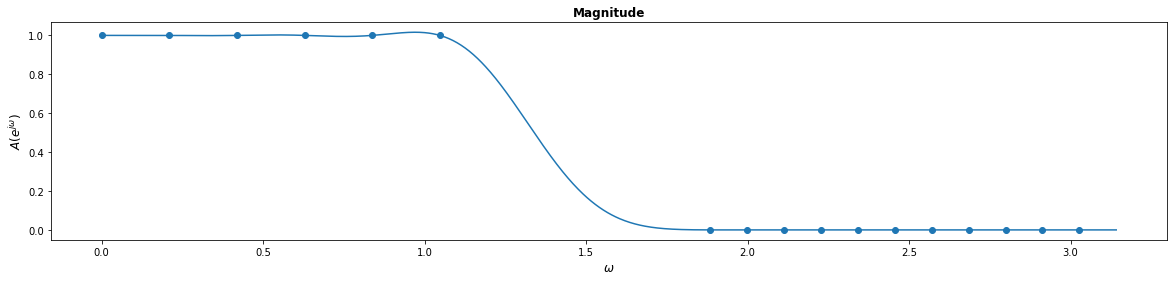

In [178]:
#Given data

wp = 0.4*pi    #Pass band
ws = 0.6*pi    #Stop band
e = 0.001      #Tolerance
W = 1          #Weight function
L = 15         #Order of the polynomial
ak,delta = fil_des(wp,ws,e,L)

Maximum Error is δ = [7.56714326e-09]


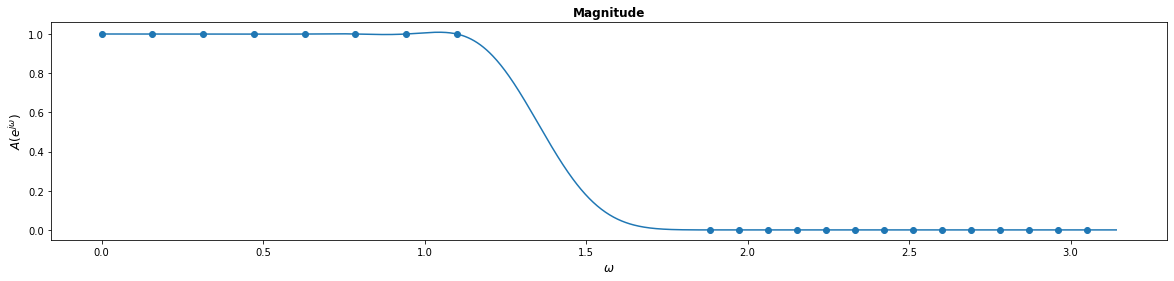

In [179]:
L = 20         #Order of the polynomial
ak,delta = fil_des(wp,ws,e,L)

Maximum Error is δ = [1.36594881e-10]


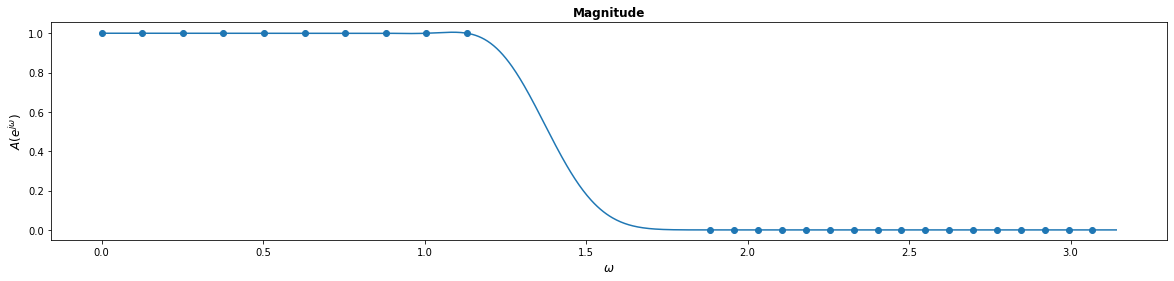

In [180]:
L = 25         #Order of the polynomial
ak,delta = fil_des(wp,ws,e,L)

Maximum Error is δ = [2.40097173e-12]


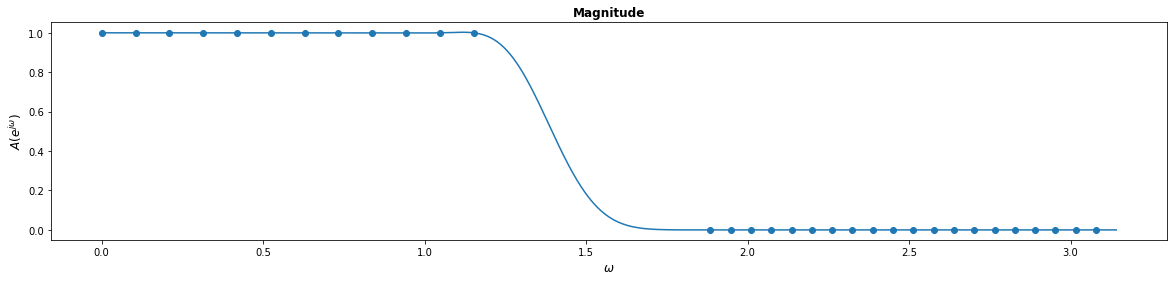

In [181]:
L = 30         #Order of the polynomial
ak,delta = fil_des(wp,ws,e,L)

Maximum Error is δ = [4.13608314e-14]


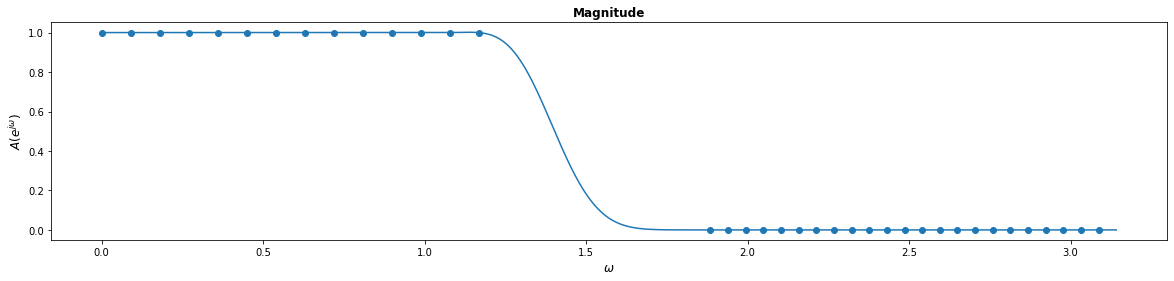

In [182]:
L = 35         #Order of the polynomial
ak,delta = fil_des(wp,ws,e,L)

$\textbf{Problem-2}$:
    
Implement the discrete Fourier transform (DFT) synthesis and analysis equations for a user-specified length N. Compare your code with Python implementation numpy.fft, numpy.ifft for a sample input x[n] of your choice. 